In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import cv2                 
import numpy as np         
import os,sys                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import glob

In [14]:
train_data_path='/content/drive/My Drive/leukemia/cancer/train'
valid_data_path='/content/drive/My Drive/leukemia/cancer/test'

In [9]:
def read_images(path,name):
  images=[]
  labels=[]
  for img in glob.glob(path+'/'+name+'/*.jpeg'):
    imag=cv2.imread(img)
    image=resize(imag,(48,48,3))
    images.append(image)
    labels.append(name)
  return images,labels

In [6]:
images_cancer,labels=read_images(train_data_path,'Cancer')
np.array(images_cancer).shape

(2478, 48, 48, 3)

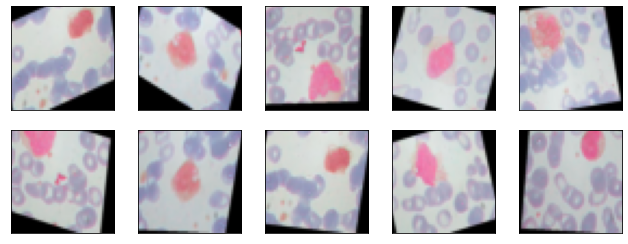

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([]) 
  plt.yticks([])
  plt.grid(True)
  plt.imshow(images_cancer[i])

In [47]:
labels=['Cancer','Normal']
def getData(path):
  all_images=[]
  all_labels=[]
  for label in labels:
     images,labels_data=read_images(path,label)
     all_images+=images
     all_labels+=labels_data
  return all_images,all_labels

In [48]:
X_train,y_train=getData(train_data_path)
X_valid,y_valid=getData(valid_data_path)

In [49]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_valid=np.array(X_valid)
y_valid=np.array(y_valid)

In [50]:
y_train.shape

(4961,)

In [51]:
dict={0:'cancer',1:'healthy'}

In [52]:
def to_category(data):
 for i,element in enumerate(data):
   if element=='Cancer':
     data[i]=0
   else:
     data[i]=1

In [53]:
to_category(y_train)
to_category(y_valid)

In [54]:
import tensorflow as tf
y_train=tf.keras.utils.to_categorical(y_train,2)
y_valid=tf.keras.utils.to_categorical(y_valid,2)

In [41]:
from tensorflow import keras 
from keras.layers import Conv2D,Dense, Flatten, MaxPooling2D,Dropout,Activation
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


In [42]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))



model.add(Flatten())
model.add(Dense(units=1024,kernel_regularizer=l2(0.001),activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(2,activation='sigmoid'))

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=50)

Epoch 1/50
249/249 [==============================] - 262s 1s/step - loss: 1.1979 - accuracy: 0.8418 - val_loss: 5.5560 - val_accuracy: 0.5036
Epoch 2/50
249/249 [==============================] - 260s 1s/step - loss: 0.6399 - accuracy: 0.9258 - val_loss: 0.6432 - val_accuracy: 0.8847
Epoch 3/50
249/249 [==============================] - 259s 1s/step - loss: 0.4046 - accuracy: 0.9426 - val_loss: 11.7039 - val_accuracy: 0.5044
Epoch 4/50
249/249 [==============================] - 258s 1s/step - loss: 0.3034 - accuracy: 0.9522 - val_loss: 7.7518 - val_accuracy: 0.5428
Epoch 5/50
249/249 [==============================] - 259s 1s/step - loss: 0.2330 - accuracy: 0.9625 - val_loss: 7.5473 - val_accuracy: 0.4964
Epoch 6/50
249/249 [==============================] - 258s 1s/step - loss: 0.1575 - accuracy: 0.9784 - val_loss: 15.6438 - val_accuracy: 0.5036
Epoch 7/50
249/249 [==============================] - 258s 1s/step - loss: 0.1777 - accuracy: 0.9722 - val_loss: 6.0448 - val_accuracy: 0.51

KeyboardInterrupt: ignored

In [66]:
from skimage import io
image_path='drive/My Drive/leukemia/cancer/val/Normal/22.jpeg'
image=io.imread(image_path)

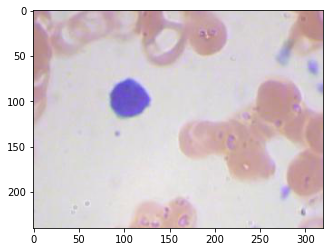

In [67]:

plt.subplot(1,1,1)
plt.imshow(image)

In [68]:
image=np.asarray(image)
img=resize(image,(48,48,3))

In [69]:
tab=[]
tab.append(img)
tab=np.array(tab)
print(dict[np.argmax(model.predict(tab))])

healthy
